In [69]:
from savant_data_downloader.savant_data_downloader import get_new_data
import polars as pl
from datetime import datetime, date
import pybaseball as pb
import pprint
from utils import get_sheet_data, get_ABS_universe

In [70]:
abs_challenges_end_ab = pl.read_csv("data/abs_challenges_end_ab.csv")
abs_challenges_end_ab

des,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,…,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle
str,str,str,f64,f64,f64,str,i64,i64,str,str,str,str,str,str,i64,str,str,str,str,str,str,i64,str,i64,i64,i64,f64,f64,f64,f64,i64,i64,i64,i64,i64,str,…,str,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,f64,str,str,str,str,str,str,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,str,str,str,str,f64,f64,f64,str
"""Rays challenged (pitch result)…","""CH""","""2025-02-21""",85.0,-1.25,5.75,"""Orze, Eric""",665862,679358,null,"""ball""",null,null,null,null,13,"""S""","""L""","""R""","""NYY""","""TB""","""B""",null,null,0,1,2025,-1.11,-0.12,-0.12,0.71,null,null,null,2,3,"""Bot""",…,"""Changeup""",2,0,2,0,0,2,2,0,"""Standard""","""Standard""",248,0.0,null,null,null,null,null,null,2,2,0.746,0.746,27,27,28,27,1,1,null,null,null,null,3.27,1.11,-1.11,null
"""Mariners challenged (pitch res…","""FF""","""2025-02-21""",94.7,-0.83,5.78,"""Pena, Francis""",702284,800212,null,"""called_strike""",null,null,null,null,3,"""S""","""L""","""R""","""SD""","""SEA""","""S""",null,null,0,0,2025,-0.91,0.86,0.59,2.95,null,null,null,2,9,"""Top""",…,"""4-Seam Fastball""",5,2,2,5,2,5,2,5,"""Strategic""","""Standard""",218,0.0,null,null,null,null,null,null,3,-3,0.996,0.004,24,21,24,22,1,1,null,null,null,null,1.68,0.91,-0.91,null
"""Dodgers challenged (pitch resu…","""KC""","""2025-02-22""",81.1,-1.29,6.0,"""Hernández, Carlos""",592696,672578,null,"""ball""",null,null,null,null,13,"""S""","""L""","""R""","""LAD""","""KC""","""B""",null,null,0,1,2025,0.26,-0.92,-1.01,1.46,null,606192,571970,1,4,"""Bot""",…,"""Knuckle Curve""",5,5,5,5,5,5,5,5,"""Standard""","""Strategic""",44,0.0,null,null,null,null,null,null,0,0,0.604,0.604,28,33,28,34,1,2,null,null,null,null,4.38,-0.26,0.26,null
"""Royals challenged (pitch resul…","""FC""","""2025-02-22""",87.7,-1.49,6.1,"""Wallace, Jacob""",674976,686608,null,"""ball""",null,null,null,null,14,"""S""","""R""","""R""","""LAD""","""KC""","""B""",null,null,0,0,2025,0.09,0.18,0.98,2.01,null,null,null,2,9,"""Bot""",…,"""Cutter""",10,11,10,11,11,10,10,11,"""Standard""","""Standard""",54,0.0,null,null,null,null,null,null,-1,-1,0.044,0.044,26,27,27,27,1,1,null,null,null,null,2.77,-0.09,-0.09,null
"""Rangers challenged (pitch resu…","""FF""","""2025-02-22""",94.0,0.91,6.58,"""Romero, Enny""",669701,544836,null,"""called_strike""",null,null,null,null,13,"""S""","""L""","""L""","""TEX""","""SF""","""S""",null,null,0,0,2025,0.22,1.36,-0.84,2.19,null,679822,null,2,3,"""Bot""",…,"""4-Seam Fastball""",0,2,0,2,2,0,0,2,"""Standard""","""Standard""",148,0.0,null,null,null,null,null,null,-2,-2,0.298,0.298,34,27,34,28,1,1,null,null,null,null,1.22,0.22,0.22,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""White Sox challenged (pitch re…","""CU""","""2025-03-02""",81.0,-0.18,6.77,"""Karinchak, James""",571970,675916,null,"""called_strike""",null,null,null,null,8,"""S""","""L""","""R""","""LAD""","""CWS""","""S""",null,null,0,0,2025,-0.2,-0.44,-0.12,1.74,null,null,80054

In [71]:
manual_data = get_sheet_data()
manual_data = manual_data.with_columns(
    pl.concat_str(
        [
            pl.col("pitcher_last_name"),
            pl.col("pitcher_first_name"),
        ],
        separator=", ",
    ).alias("player_name"),
)

In [72]:
start_date = '2025-02-01'

today = date.today()
print("Today's date:", today)

# To format the date, you can use strftime()
end_date = today.strftime("%Y-%m-%d") # Year-month-day
print("Formatted date:", end_date)

# Pull all spring training pitches
data = get_new_data(start_date, end_date)

ABS_universe = get_ABS_universe(data)

Today's date: 2025-03-04
Formatted date: 2025-03-04


Fetching Statcast Data: 100%|██████████| 32/32 [00:01<00:00, 30.58it/s] 


In [73]:
ABS_universe.filter(
    pl.col('game_date') == datetime.strptime("2025-03-02", "%Y-%m-%d"),
    pl.col('inning')==1,
    pl.col('balls')==0,
    pl.col('strikes')==0,
    pl.col('outs_when_up')==0,
    pl.col('home_team')=='TOR'
)


pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,home_team,away_team,type,hit_location,bb_type,balls,strikes,game_year,pfx_x,pfx_z,plate_x,plate_z,on_3b,on_2b,on_1b,outs_when_up,inning,inning_topbot,…,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle
str,date,f64,f64,f64,str,i64,i64,str,str,i64,i64,i64,i64,i64,str,str,str,str,str,str,str,i64,str,i64,i64,i64,f64,f64,f64,f64,i64,i64,i64,i64,i64,str,…,str,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,f64,i64,f64,f64,f64,i64,f64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,i64
"""FF""",2025-03-02,92.6,-2.26,6.65,"""Walker, Taijuan""",662139,592836,null,"""ball""",null,null,null,null,11,"""Daulton Varsho homers (2) on a…","""S""","""L""","""R""","""TOR""","""PHI""","""B""",null,null,0,0,2025,-0.87,1.23,-0.57,3.65,null,null,666182,0,1,"""Bot""",…,"""4-Seam Fastball""",0,0,0,0,0,0,0,0,"""Standard""","""Standard""",215,-0.057,null,null,null,null,null,null,0,0,0.583,0.583,32,28,33,29,1,0,null,null,null,null,1.44,0.87,-0.87,null
"""FF""",2025-03-02,93.7,-2.25,6.65,"""Walker, Taijuan""",666182,592836,null,"""called_strike""",null,null,null,null,8,"""Bo Bichette singles on a groun…","""S""","""R""","""R""","""TOR""","""PHI""","""S""",null,null,0,0,2025,-0.89,1.6,0.11,2.05,null,null,null,0,1,"""Bot""",…,"""4-Seam Fastball""",0,0,0,0,0,0,0,0,"""Standard""","""Standard""",215,0.0,null,null,null,null,null,null,0,0,0.547,0.547,32,27,33,27,1,0,null,null,null,null,1.04,0.89,0.89,null
"""FF""",2025-03-02,90.9,-3.02,5.96,"""Scherzer, Max""",607208,453286,null,"""called_strike""",null,null,null,null,6,"""Trea Turner pops out to second…","""S""","""R""","""R""","""TOR""","""PHI""","""S""",null,null,0,0,2025,-0.99,1.35,0.43,2.25,null,null,null,0,1,"""Top""",…,"""4-Seam Fastball""",0,0,0,0,0,0,0,0,null,null,221,0.0,null,null,null,null,null,null,0,0,0.5,0.5,40,32,41,32,1,0,null,null,null,null,1.44,0.99,0.99,null


In [74]:
joined_data = manual_data.join(
    ABS_universe, 
    ['game_date', 'inning', 'balls', 'strikes', 'outs_when_up', 'home_team', 'away_team', 'player_name'],
    how="left"
)

joined_data

abs_index,abs_successful,abs_type,abs_caller,game_date,batter_first_name,batter_last_name,pitcher_first_name,pitcher_last_name,home_team,away_team,inning,outs_when_up,balls,strikes,source,Contributor,player_name,pitch_type,release_speed,release_pos_x,release_pos_z,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,type,hit_location,…,pitch_name,home_score,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle
i32,str,str,str,date,str,str,str,str,str,str,i8,i8,i8,i8,str,str,str,str,f64,f64,f64,i64,i64,str,str,i64,i64,i64,i64,i64,str,str,str,str,str,i64,…,str,i64,i64,i64,i64,i64,i64,i64,i64,str,str,i64,f64,i64,f64,f64,f64,i64,f64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,i64
0,"""yes""","""Strike To Ball""","""batter""",2025-02-22,"""Everson""","""Pereira""","""Eric""","""Pardinho""","""TOR""","""NYY""",6,2,3,2,"""https://www.espn.com/mlb/story…","""Seth Billiau""","""Pardinho, Eric""","""FF""",93.1,-1.2,5.62,677592,672078,"""walk""","""ball""",null,null,null,null,14,"""Everson Pereira walks.""","""S""","""R""","""R""","""B""",null,…,"""4-Seam Fastball""",4,0,0,4,0,4,0,4,"""Standard""","""Standard""",218,-0.008,null,null,null,null,null,null,4,-4,0.951,0.049,24,24,24,24,1,2,null,null,null,null,1.04,0.67,0.67,null
1,"""yes""","""Ball To Strike""","""catcher""",2025-02-21,"""Kyle""","""Farmer""","""Corbin""","""Burnes""","""AZ""","""COL""",1,1,1,2,"""https://www.sportico.com/leagu…","""Seth Billiau""","""Burnes, Corbin""","""FC""",94.2,-0.79,5.98,571657,669203,"""strikeout""","""called_strike""",null,null,null,null,9,"""Kyle Farmer called out on stri…","""S""","""R""","""R""","""S""",2,…,"""Cutter""",0,0,0,0,0,0,0,0,"""Standard""","""Standard""",194,0.015,null,null,null,null,null,null,0,0,0.522,0.478,30,34,31,35,1,0,null,null,null,null,1.47,-0.11,-0.11,null
2,"""yes""","""Ball To Strike""","""catcher""",2025-02-20,"""Max""","""Muncy""","""Cody""","""Poteet""","""LAD""","""CHC""",1,0,0,1,"""https://www.mlb.com/video/cubs…","""Seth Billiau""","""Poteet, Cody""","""FF""",95.1,-1.18,6.32,571970,547001,null,"""called_strike""",null,null,null,null,9,"""Max Muncy called out on strike…","""S""","""L""","""R""","""S""",null,…,"""4-Seam Fastball""",0,0,0,0,0,0,0,0,"""Strategic""","""Strategic""",216,0.0,null,null,null,null,null,null,0,0,0.583,0.583,30,34,31,35,1,0,null,null,null,null,1.24,0.7,-0.7,null
3,"""yes""","""Strike To Ball""","""batter""",2025-02-23,"""Andy""","""Pages""","""Manuel""","""Castro""","""LAD""","""SD""",3,2,0,2,"""https://x.com/TalkingFriars/st…","""Seth Billiau""","""Castro, Manuel""","""SI""",94.5,-1.09,6.1,681624,701195,null,"""ball""",null,null,null,null,12,"""Andy Pages called out on strik…","""S""","""R""","""R""","""B""",null,…,"""Sinker""",3,2,3,2,2,3,3,2,"""Standard""","""Standard""",221,0.0,null,null,null,null,null,null,1,1,0.693,0.693,23,24,23,25,1,1,null,null,null,null,1.3,1.16,1.16,null
4,"""yes""","""Ball To Strike""","""catcher""",2025-02-25,"""Cole""","""Fontenelle""","""Yuki""","""Matsui""","""SD""","""LAA""",5,0,1,1,"""https://x.com/TalkingFriars/st…","""Seth Billiau""","""Matsui, Yuki""","""FF""",90.9,2.07,6.14,694304,673513,null,"""called_strike""",null,null,null,null,8,"""Cole Fontenelle grounds into a…","""S""","""R""","""L""","""S""",null,…,"""4-Seam Fastball""",0,0,0,0,0,0,0,0,"""Standard""","""Standard""",161,0.0,null,null,null,null,

In [75]:
# matplotlib map colors
joined_data = joined_data.with_columns(
    pl.when(pl.col('abs_type').str.contains("Strike To Ball")).then(pl.lit("blue")).otherwise(pl.lit("red")).alias('color')
)
# matplotlib map marker
joined_data = joined_data.with_columns(
    pl.when(pl.col('abs_successful').str.contains("yes")).then(pl.lit(".")).otherwise(pl.lit("x")).alias('marker')
)

joined_data

abs_index,abs_successful,abs_type,abs_caller,game_date,batter_first_name,batter_last_name,pitcher_first_name,pitcher_last_name,home_team,away_team,inning,outs_when_up,balls,strikes,source,Contributor,player_name,pitch_type,release_speed,release_pos_x,release_pos_z,batter,pitcher,events,description,spin_dir,spin_rate_deprecated,break_angle_deprecated,break_length_deprecated,zone,des,game_type,stand,p_throws,type,hit_location,…,away_score,bat_score,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp,bat_speed,swing_length,estimated_slg_using_speedangle,delta_pitcher_run_exp,hyper_speed,home_score_diff,bat_score_diff,home_win_exp,bat_win_exp,age_pit_legacy,age_bat_legacy,age_pit,age_bat,n_thruorder_pitcher,n_priorpa_thisgame_player_at_bat,pitcher_days_since_prev_game,batter_days_since_prev_game,pitcher_days_until_next_game,batter_days_until_next_game,api_break_z_with_gravity,api_break_x_arm,api_break_x_batter_in,arm_angle,color,marker
i32,str,str,str,date,str,str,str,str,str,str,i8,i8,i8,i8,str,str,str,str,f64,f64,f64,i64,i64,str,str,i64,i64,i64,i64,i64,str,str,str,str,str,i64,…,i64,i64,i64,i64,i64,i64,i64,str,str,i64,f64,i64,f64,f64,f64,i64,f64,i64,i64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,i64,str,str
0,"""yes""","""Strike To Ball""","""batter""",2025-02-22,"""Everson""","""Pereira""","""Eric""","""Pardinho""","""TOR""","""NYY""",6,2,3,2,"""https://www.espn.com/mlb/story…","""Seth Billiau""","""Pardinho, Eric""","""FF""",93.1,-1.2,5.62,677592,672078,"""walk""","""ball""",null,null,null,null,14,"""Everson Pereira walks.""","""S""","""R""","""R""","""B""",null,…,0,0,4,0,4,0,4,"""Standard""","""Standard""",218,-0.008,null,null,null,null,null,null,4,-4,0.951,0.049,24,24,24,24,1,2,null,null,null,null,1.04,0.67,0.67,null,"""blue""","""."""
1,"""yes""","""Ball To Strike""","""catcher""",2025-02-21,"""Kyle""","""Farmer""","""Corbin""","""Burnes""","""AZ""","""COL""",1,1,1,2,"""https://www.sportico.com/leagu…","""Seth Billiau""","""Burnes, Corbin""","""FC""",94.2,-0.79,5.98,571657,669203,"""strikeout""","""called_strike""",null,null,null,null,9,"""Kyle Farmer called out on stri…","""S""","""R""","""R""","""S""",2,…,0,0,0,0,0,0,0,"""Standard""","""Standard""",194,0.015,null,null,null,null,null,null,0,0,0.522,0.478,30,34,31,35,1,0,null,null,null,null,1.47,-0.11,-0.11,null,"""red""","""."""
2,"""yes""","""Ball To Strike""","""catcher""",2025-02-20,"""Max""","""Muncy""","""Cody""","""Poteet""","""LAD""","""CHC""",1,0,0,1,"""https://www.mlb.com/video/cubs…","""Seth Billiau""","""Poteet, Cody""","""FF""",95.1,-1.18,6.32,571970,547001,null,"""called_strike""",null,null,null,null,9,"""Max Muncy called out on strike…","""S""","""L""","""R""","""S""",null,…,0,0,0,0,0,0,0,"""Strategic""","""Strategic""",216,0.0,null,null,null,null,null,null,0,0,0.583,0.583,30,34,31,35,1,0,null,null,null,null,1.24,0.7,-0.7,null,"""red""","""."""
3,"""yes""","""Strike To Ball""","""batter""",2025-02-23,"""Andy""","""Pages""","""Manuel""","""Castro""","""LAD""","""SD""",3,2,0,2,"""https://x.com/TalkingFriars/st…","""Seth Billiau""","""Castro, Manuel""","""SI""",94.5,-1.09,6.1,681624,701195,null,"""ball""",null,null,null,null,12,"""Andy Pages called out on strik…","""S""","""R""","""R""","""B""",null,…,2,3,2,2,3,3,2,"""Standard""","""Standard""",221,0.0,null,null,null,null,null,null,1,1,0.693,0.693,23,24,23,25,1,1,null,null,null,null,1.3,1.16,1.16,null,"""blue""","""."""
4,"""yes""","""Ball To Strike""","""catcher""",2025-02-25,"""Cole""","""Fontenelle""","""Yuki""","""Matsui""","""SD""","""LAA""",5,0,1,1,"""https://x.com/TalkingFriars/st…","""Seth Billiau""","""Matsui, Yuki""","""FF""",90.9,2.07,6.14,694304,673513,null,"""called_strike""",null,null,null,null,8,"""Cole Fontenelle grounds into a…","""S""","""R""","""L""","""S""",null,…,0,0,0,0,0,0,0,"""Standard""","""Standard""",161,0.0,null,null,null,null,null,null,0,0,0.453,0.547,29,23,30,23

In [117]:
combinations = [("Strike To Ball","yes"),
                ("Strike To Ball","no"), 
                ("Ball To Strike", "yes"), 
                ("Ball To Strike","no")]

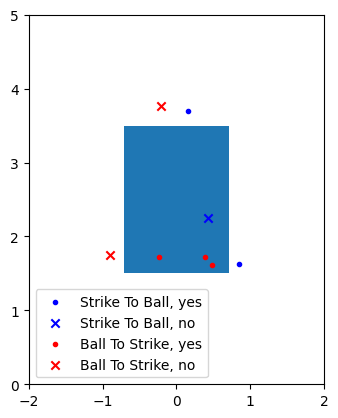

In [138]:
#https://github.com/instant-replay-academy/MLB-PitchFx-Python/blob/master/GamedaySample.ipynb

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

"""matplotlib.pyplot is a collection of command shell style functions that make matplotlib 
work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, 
creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
Pyplot maintains state across calls."""

fig1 = plt.figure()
ax = fig1.add_subplot(111, aspect='equal')

platewidthInFeet = 17 / 12 # plate is 17 inches wide
expandedPlateInFeet = 20 / 12 # add ball width (half on each side)
szHeightInFeet = 3.5 - 1.5
ballInFeet = 3 / 12
halfBallInFeet = ballInFeet / 2

# draw expanded zone: 3 inch ball (.25 ft) = 1.5 inches all the way around
# ax.add_patch(patches.Rectangle((expandedPlateInFeet/-2, 1.5 - halfBallInFeet), expandedPlateInFeet, szHeightInFeet + ballInFeet, color='lightblue'))

# draw formal zone (plate only)
ax.add_patch(patches.Rectangle((platewidthInFeet/-2, 1.5), platewidthInFeet, szHeightInFeet))

# draw my pitch
for typ, success in combinations:
    filtered_data = joined_data.filter(pl.col('abs_type')==typ, pl.col('abs_successful')==success)
    ax.scatter(x=filtered_data["plate_x"], 
               y=filtered_data["plate_z"], 
               marker=filtered_data["marker"][0], 
               color=filtered_data["color"][0], 
               label=typ + ", " + success)

plt.ylim(0, 5)
plt.xlim(-2, 2)
plt.legend()

plt.show()

In [148]:
#https://github.com/instant-replay-academy/MLB-PitchFx-Python/blob/master/GamedaySample.ipynb

import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

"""matplotlib.pyplot is a collection of command shell style functions that make matplotlib 
work like MATLAB. Each pyplot function makes some change to a figure: e.g., creates a figure, 
creates a plotting area in a figure, plots some lines in a plotting area, decorates the plot with labels, etc.
Pyplot maintains state across calls."""

def plot_pitches(data):
    combinations = [("Strike To Ball","yes"),
                ("Strike To Ball","no"), 
                ("Ball To Strike", "yes"), 
                ("Ball To Strike","no")]
    fig1 = plt.figure()
    ax = fig1.add_subplot(111, aspect='equal')
    
    platewidthInFeet = 17 / 12 # plate is 17 inches wide
    expandedPlateInFeet = 20 / 12 # add ball width (half on each side)
    szHeightInFeet = 3.5 - 1.5
    ballInFeet = 3 / 12
    halfBallInFeet = ballInFeet / 2
    
    # draw formal zone (plate only)
    ax.add_patch(patches.Rectangle((platewidthInFeet/-2, 1.5), platewidthInFeet, szHeightInFeet))
    
    # draw my pitch
    for typ, success in combinations:
        filtered_data = data.filter(pl.col('abs_type')==typ, 
                                    pl.col('abs_successful')==success)
        ax.scatter(x=filtered_data["plate_x"], 
                   y=filtered_data["plate_z"], 
                   marker=filtered_data["marker"][0], 
                   color=filtered_data["color"][0], 
                   label=typ + ", " + success)
    
    plt.ylim(0, 5)
    plt.xlim(-2, 2)
    plt.legend()
    
    plt.show()

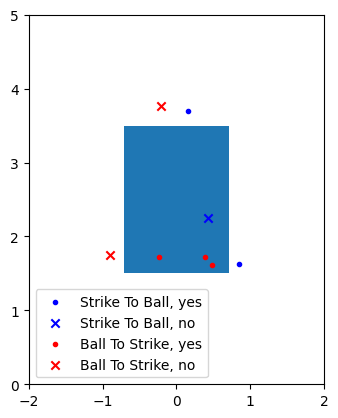

In [149]:
plot_pitches(joined_data)